### stripplot: Seaborn

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars = sns.load_dataset("mpg").dropna()

cars.shape

(392, 9)

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Intro Visuals

### Basics



In [4]:
sns.set_style("whitegrid")

In [5]:
cars.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

#### Filter down only the even number of cylinders

In [6]:
cars = cars[cars["cylinders"].isin([4, 6, 8])]

<Axes: xlabel='weight'>

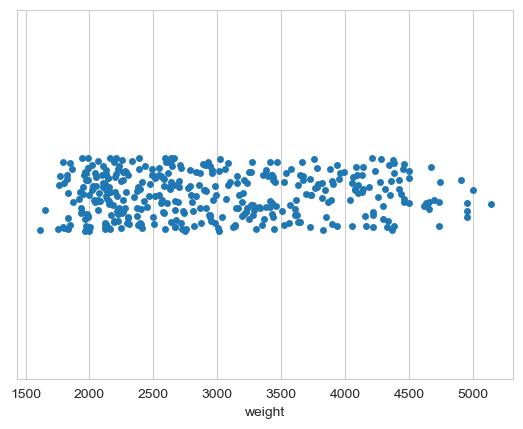

In [7]:
sns.stripplot(x=cars.weight)

<Axes: xlabel='weight', ylabel='origin'>

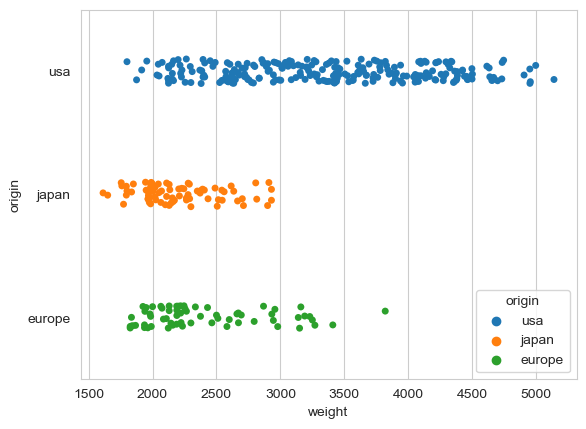

In [8]:
sns.stripplot(x=cars.weight, y=cars.origin,
             hue=cars.origin)

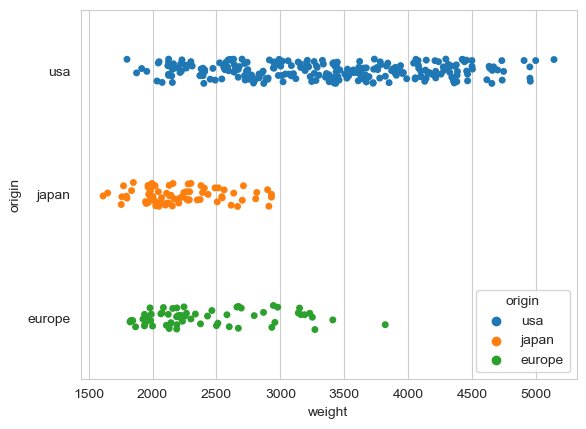

In [9]:
sns.stripplot(x="weight", y="origin",
              data=cars,
              hue="origin"
             );

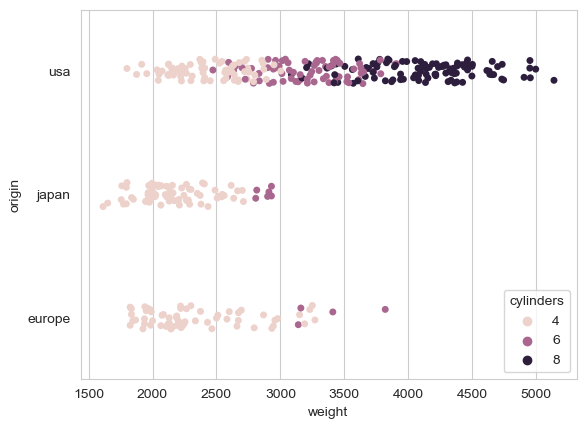

In [10]:
sns.stripplot(x="weight", y="origin", data=cars,
             hue="cylinders"
             );

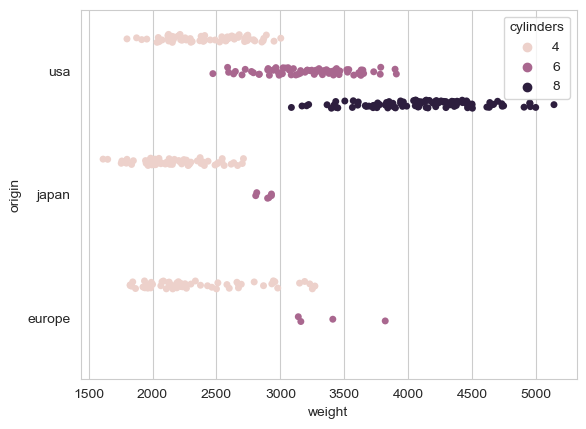

In [11]:
sns.stripplot(x="weight", y="origin",
             data=cars,
             hue="cylinders", 
             dodge=True
             );

### Orientation

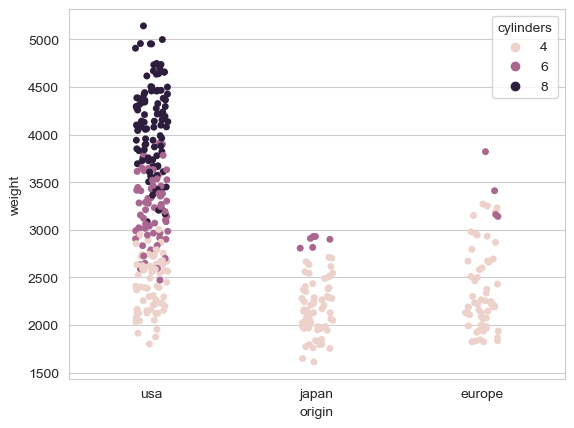

In [12]:
sns.stripplot(x="origin", y="weight", 
             data=cars,
              hue="cylinders"
             );

### Styling


In [13]:
sns.set_style("white")

### jitter

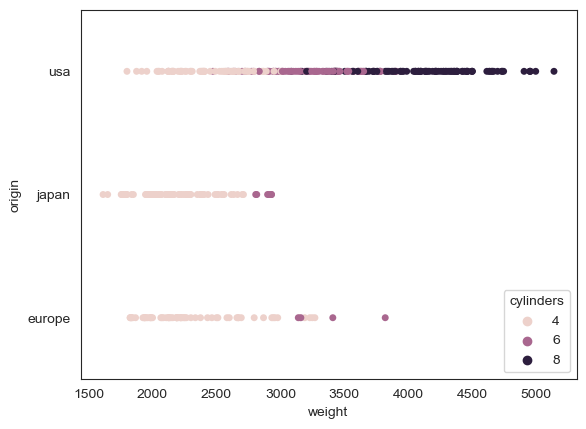

In [14]:
sns.stripplot(x="weight", y="origin", data=cars,
             hue="cylinders",
              jitter=False
             );

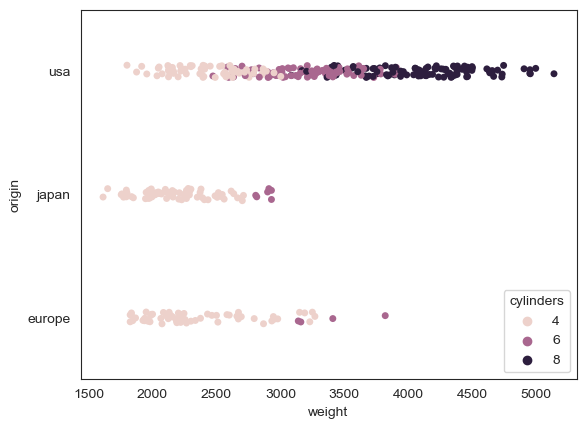

In [15]:
sns.stripplot(x="weight", y="origin", data=cars,
             hue="cylinders",
             jitter=0.05
             );

In [16]:
from ipywidgets import interactive

def jitter_widget(jitter=0.1):
    sns.stripplot(x="weight", y="origin", data=cars, jitter=jitter);
    

In [17]:
interactive(jitter_widget, jitter=(0, 0.65, 0.05))

interactive(children=(FloatSlider(value=0.1, description='jitter', max=0.65, step=0.05), Output()), _dom_class…

### alpha

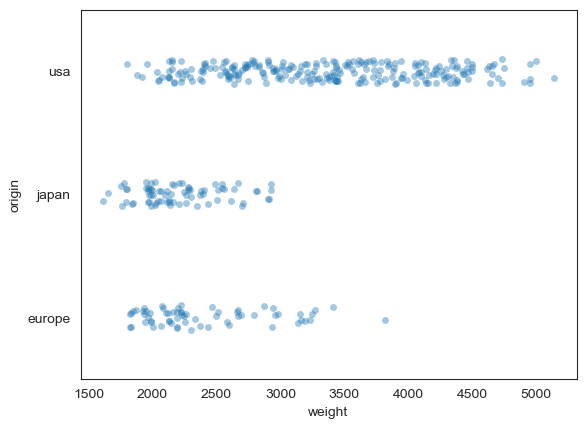

In [18]:
sns.stripplot(x=cars.weight, y=cars.origin,
             alpha=0.4,
              size=5
             );

### linewidth, edgecolor

<Axes: xlabel='weight', ylabel='origin'>

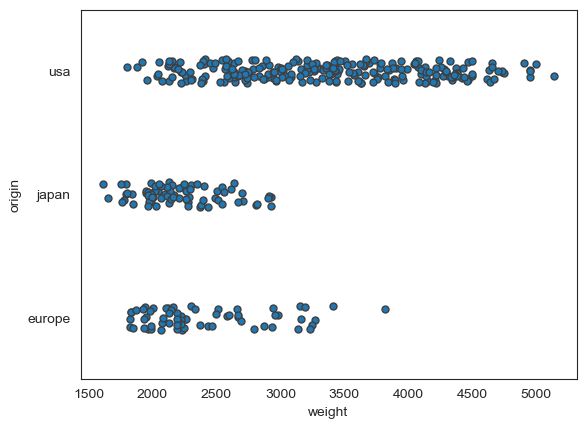

In [19]:
sns.stripplot(x="weight", y="origin", data=cars,
             linewidth=1)

<Axes: xlabel='weight', ylabel='origin'>

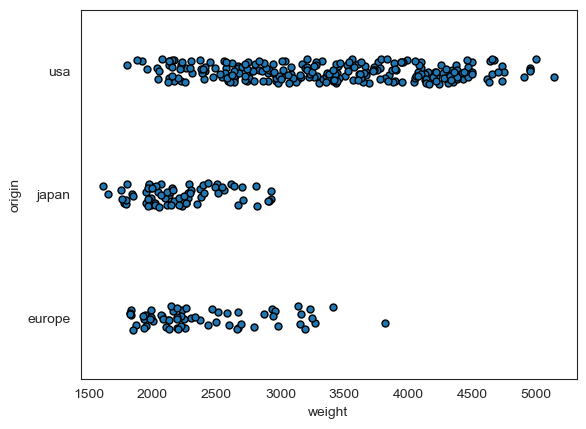

In [20]:
sns.stripplot(x="weight", y="origin", data=cars,
             linewidth=1, edgecolor="black")

### markers

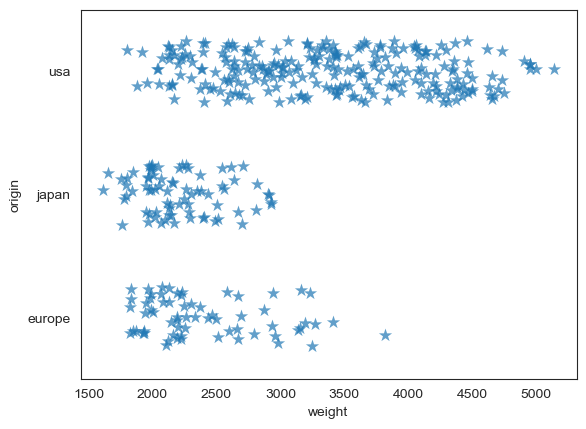

In [21]:
sns.stripplot(x=cars.weight, y=cars.origin, data=cars,
             alpha=0.7, size=10, jitter=0.25, marker="*"
             );

### Example Gallery

In [24]:
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("axes", labelsize=14)

#### cylinders by hue

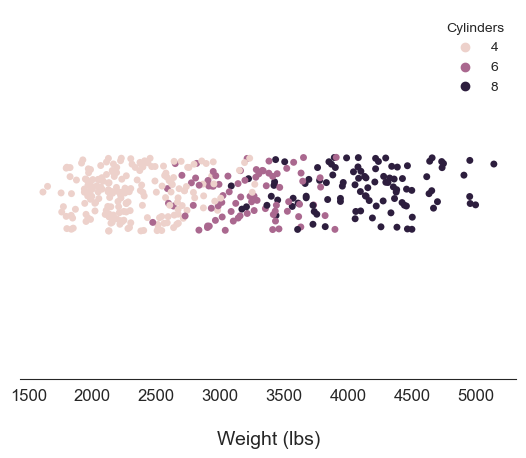

In [51]:
sns.set_style("white")

sns.stripplot(x="weight", y=[""]*len(cars), hue="cylinders", data=cars, 
              palette=sns.cubehelix_palette(3));

sns.despine(left=True)
plt.xlabel("\nWeight (lbs)")
plt.legend(title="Cylinders", frameon=False);

####  Newer models, vertical

In [57]:
sns.set_style("darkgrid")
cars["newer_model"] = [True if mode_year > 76 else False for mode_year in cars.model_year]

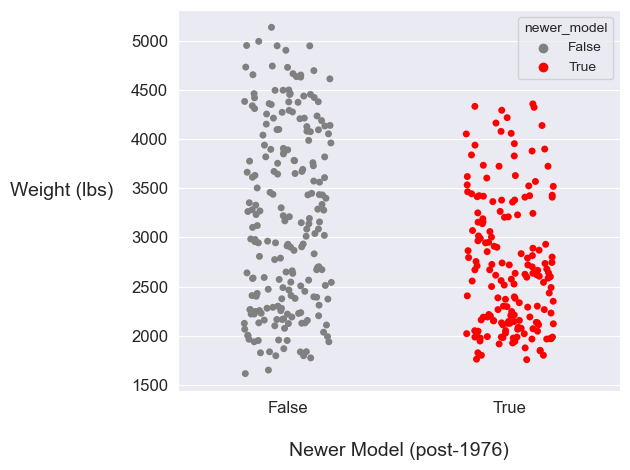

In [70]:
sns.stripplot(x="newer_model", y="weight", hue="newer_model", data=cars,
             jitter=0.2,
             palette=["gray", "red"]);

plt.xlabel("\nNewer Model (post-1976)")
plt.ylabel("Weight (lbs)", rotation=0, labelpad=50)
plt.tight_layout();

#### Low, medium, high, MPG

In [82]:
# first method
cars["mpg_range"] = cars["mpg"].map(lambda x: "Low" if x<19 else ("Medium" if x<27 else "High"))

# second method
cars["mpg_range_for"] = ["Low" if m<19 else ("Medium" if m<27 else "High") for m in cars.mpg]

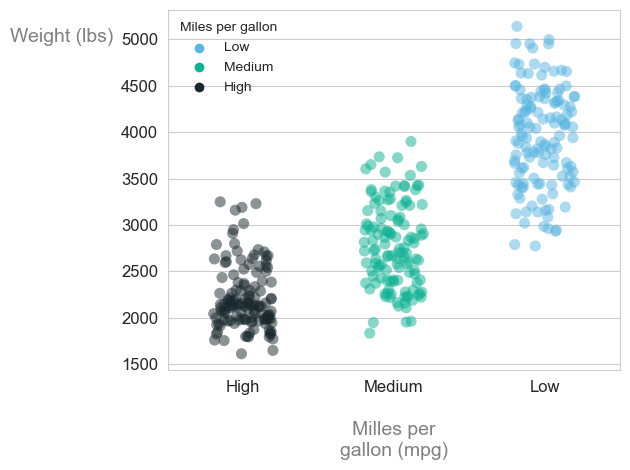

In [111]:
sns.set_style("whitegrid")

sns.stripplot(x=cars.mpg_range, y=cars.weight, hue=cars.mpg_range,
              order=["High", "Medium", "Low"],
             palette=["#58b5e1", "#0db293", "#19282d"],
              jitter=0.2,
              alpha=0.5,
              size=8
             );
plt.xlabel("\nMilles per\ngallon (mpg)",color="gray")
plt.ylabel("\nWeight (lbs)", rotation=0,
           labelpad=80,
           color="gray",
          ha="left",
          position=(-0.8, .9)
          )
plt.legend(title="Miles per gallon", frameon=False)
plt.tight_layout();

#### Company Smileys

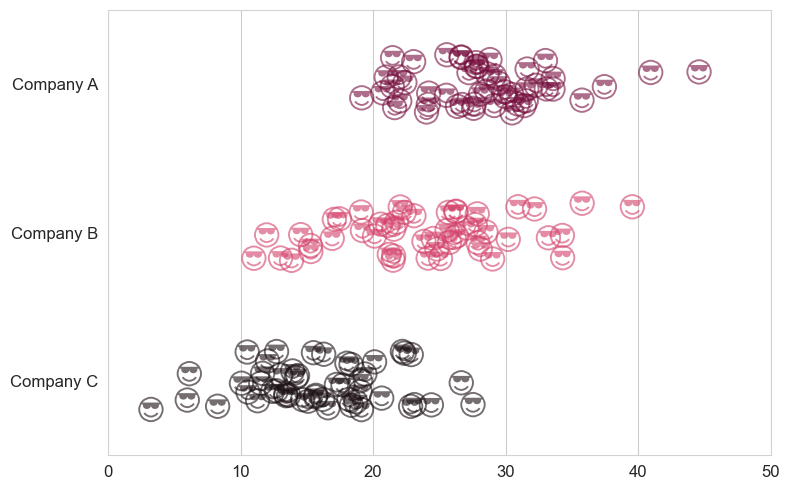

In [156]:
import random
random.seed(11)

points = 50
data = [random.gauss(28, 5) for _ in range(points)]
data.extend([random.gauss(20, 8) for _ in range(points)])
data.extend([random.gauss(15, 5) for _ in range(points)])
company = ["Company A"]*points + ["Company B"]*points + ["Company C"]*points

plt.figure(figsize=(8, 5))
sns.stripplot(x=data, y=company,
              hue=company,
             jitter=0.2,
             alpha=0.6,
             size=20, 
             marker=r"$😎$",
             palette=["#750e3d", "#d34069", "#190e11"]
             );
for pos in ["left", "right", "top", "bottom"]:
    plt.gca().spines[pos].set_edgecolor("lightgray")
plt.xticks([0, 10, 20, 30, 40, 50])
plt.legend()
plt.gca().get_legend().remove()
plt.tight_layout();

#### Boxplot overlay

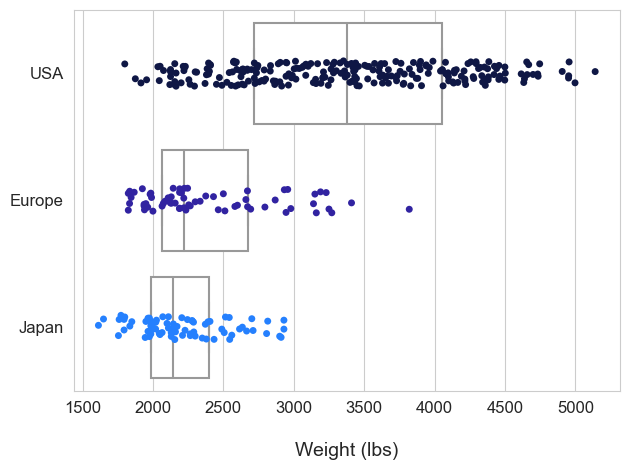

In [155]:
sns.boxplot(x=cars.weight, y=cars.origin, whis=0, color="white", fliersize=0, order=["usa", "europe", "japan"])
sns.stripplot(x=cars.weight, y=cars.origin, hue=cars.origin, palette=["#0f1745", "#2580fe", "#3123a1"], order=['usa', 'europe', 'japan'])
plt.xlabel("\nWeight (lbs)")
plt.ylabel("")
plt.yticks([0, 1, 2], ["USA", "Europe", "Japan"])
plt.tight_layout()
plt.legend()
plt.gca().get_legend().remove();